## This file aim to analyse the Market Performance in a time range and Time for the Market Recover

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

## Merge N100.csv and eu_stocks_historical_data.csv

In [ ]:
# Define the base directory for the stock and companies files
base_dir_stocks = r'C:\Users\dongv\OneDrive\Desktop\Techlabs\Techlabs_WS_Team3\01_data\03_additional\02_N100_EU'

# Define the directory for the earthquake file
base_dir_earthquake = r'C:\Users\dongv\OneDrive\Desktop\Techlabs\Techlabs_WS_Team3\01_data\02_pre'

In [3]:
# Load datasets with full paths
df_earthquake = pd.read_csv(f'{base_dir_earthquake}\\clean_major_earthquakes.csv', parse_dates=['date']) # parse_dates convert the 'date' column from a string(text) format into a datatime format
df_stocks = pd.read_csv(f'{base_dir_stocks}\\eu_stocks_historical_data.csv', parse_dates=['date'])
df_companies = pd.read_csv(f'{base_dir_stocks}\\N100.csv')

In [3]:
# Display dataset
print(df_stocks.head())
print('---')
print(df_earthquake.head())
print('---')
print(df_companies.head())


   ticker       date       open      close  volume
0  PUB.PA 2007-01-02  18.021820  18.106272  515513
1  PUB.PA 2007-01-03  18.016192  17.993671  696868
2  PUB.PA 2007-01-04  17.869812  18.049974  726205
3  PUB.PA 2007-01-05  18.044341  17.903589  758585
4  PUB.PA 2007-01-08  18.038714  18.100645  811764
---
   tsunami  significance   data_type  magnitude              state  longitude  \
0        0           613  earthquake        6.3   Papua New Guinea    146.884   
1        0           557  earthquake        6.0          Indonesia    101.032   
2        0           671  earthquake        6.6             Canada   -130.746   
3        0           630  earthquake        6.4             Canada   -130.542   
4        0           920  earthquake        6.2             Greece     22.693   

   latitude  depth       date                   time  
0    -5.878   34.0 2008-01-01  18:54:59.010000+00:00  
1    -2.782   35.0 2008-01-04  07:29:18.300000+00:00  
2    51.254   15.0 2008-01-05  11:01:0

In [4]:
# Check for missing, duplicate data

# 0. Convert 'Date' column to string to ensure .str accessor works
df_stocks['date'] = df_stocks['date'].astype(str)

# 1. Remove rows where the 'Date' column doesn't match the expected date format
df_stocks = df_stocks[df_stocks['date'].str.match(r'\d{4}-\d{2}-\d{2}', na=False)]

# 2. Convert the 'Date' column to datetime
df_stocks['date'] = pd.to_datetime(df_stocks['date'], format='%Y-%m-%d', errors='coerce')

In [5]:
# 3. Check for rows with invalid dates
invalid_dates = df_stocks[df_stocks['date'].isna()]
print("Rows with invalid dates:")
print(invalid_dates)


Rows with invalid dates:
Empty DataFrame
Columns: [ticker, date, open, close, volume]
Index: []


In [6]:
# 4. Check for missing values in each column
missing_values = df_stocks.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
ticker    0
date      0
open      0
close     0
volume    0
dtype: int64


In [7]:
# 5. Check for missing rows (e.g., gaps in the Date column)
full_date_range = pd.date_range(start=df_stocks['date'].min(), end=df_stocks['date'].max(), freq='D')
missing_dates = full_date_range.difference(df_stocks['date'])
print("\nMissing dates:")
print(missing_dates)


Missing dates:
DatetimeIndex(['2007-01-06', '2007-01-07', '2007-01-13', '2007-01-14',
               '2007-01-20', '2007-01-21', '2007-01-27', '2007-01-28',
               '2007-02-03', '2007-02-04',
               ...
               '2025-02-01', '2025-02-02', '2025-02-08', '2025-02-09',
               '2025-02-15', '2025-02-16', '2025-02-22', '2025-02-23',
               '2025-03-01', '2025-03-02'],
              dtype='datetime64[ns]', length=1975, freq=None)


In [8]:
# 6. Check for duplicate rows
duplicate_rows = df_stocks[df_stocks.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)


Duplicate rows:
Empty DataFrame
Columns: [ticker, date, open, close, volume]
Index: []


In [9]:
# 7. Check for invalid values (e.g., Volume = 0)
invalid_volume = df_stocks[df_stocks['volume'] == 0]
print("\nRows with Volume = 0:")
print(invalid_volume)


Rows with Volume = 0:
        ticker       date        open       close  volume
1872    PUB.PA 2014-05-01   40.036686   40.036686       0
3319    PUB.PA 2019-12-25   30.698679   30.698679       0
6525    AIR.PA 2014-05-01   42.727036   42.727036       0
7972    AIR.PA 2019-12-25  127.991829  127.991829       0
11178   SAF.PA 2014-05-01   42.282482   42.282482       0
...        ...        ...         ...         ...     ...
423666   SBS.F 2025-02-27   28.450001   28.450001       0
423667   SBS.F 2025-02-28   26.850000   26.850000       0
423668   SBS.F 2025-03-03   27.900000   27.900000       0
423669   SBS.F 2025-03-04   28.049999   28.049999       0
423670   SBS.F 2025-03-05   27.549999   27.549999       0

[1827 rows x 5 columns]


In [10]:
# Merge df_stocks with df_companies on 'Ticker'
merged_df = pd.merge(
    df_stocks, 
    df_companies, 
    on='ticker', 
    how='left'  # Use 'left' to keep all rows from df_stocks
)

# Reorder the columns
column_order = ['ticker', 'company_name', 'industry', 'date', 'open', 'close', 'volume']
merged_df = merged_df[column_order]

# Convert 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])
    
# Display the resulting DataFrame
print(merged_df.head())

   ticker     company_name     industry       date       open      close  \
0  PUB.PA  Publicis Groupe  Advertising 2007-01-02  18.021820  18.106272   
1  PUB.PA  Publicis Groupe  Advertising 2007-01-03  18.016192  17.993671   
2  PUB.PA  Publicis Groupe  Advertising 2007-01-04  17.869812  18.049974   
3  PUB.PA  Publicis Groupe  Advertising 2007-01-05  18.044341  17.903589   
4  PUB.PA  Publicis Groupe  Advertising 2007-01-08  18.038714  18.100645   

   volume  
0  515513  
1  696868  
2  726205  
3  758585  
4  811764  


In [ ]:
# Save result to new csv file
#merged_df.to_csv(f'{base_dir_stocks}\\clean_eu_stocks_data.csv', index=False)

## EU (Euronext 100 Index ^100) Stock Market Performance

In [ ]:
# Load the datasets

earthquake_data = pd.read_csv(f'{base_dir_earthquake}\\clean_major_earthquakes.csv') # magnitude >= 6, 2008-2023
eu_stock_data = pd.read_csv(f'{base_dir_stocks}\\clean_eu_stocks_data.csv')

print(earthquake_data.head())
print('---')
print(eu_stock_data.head())

   tsunami  significance   data_type  magnitude              state  longitude  \
0        0           613  earthquake        6.3   Papua New Guinea    146.884   
1        0           557  earthquake        6.0          Indonesia    101.032   
2        0           671  earthquake        6.6             Canada   -130.746   
3        0           630  earthquake        6.4             Canada   -130.542   
4        0           920  earthquake        6.2             Greece     22.693   

   latitude  depth        date                   time  
0    -5.878   34.0  2008-01-01  18:54:59.010000+00:00  
1    -2.782   35.0  2008-01-04  07:29:18.300000+00:00  
2    51.254   15.0  2008-01-05  11:01:06.110000+00:00  
3    51.163   10.0  2008-01-05  11:44:48.170000+00:00  
4    37.216   75.0  2008-01-06  05:14:20.180000+00:00  
---
   ticker     company_name     industry        date       open      close  \
0  PUB.PA  Publicis Groupe  Advertising  2007-01-02  18.021820  18.106272   
1  PUB.PA  Publicis

In [13]:
# Convert the 'date' column to datetime format and extract the date part.
earthquake_data['date'] = pd.to_datetime(earthquake_data['date']).dt.date
eu_stock_data['date'] = pd.to_datetime(eu_stock_data['date']).dt.date

In [14]:
# Filter Earthquake Data for Europe
# Define Europe's approximate latitude and longitude range
europe_lat_range = (36.0, 71.0)     # Latitude range for Europe (from southern Spain to northern Norway)
europe_lon_range = (-31.0, 40.0)    # Longitude range for Europe (from western Portugal to eastern Russia)

# Filter earthquakes within Europe's range
europe_earthquakes = earthquake_data[
    (earthquake_data['latitude'].between(*europe_lat_range)) &
    (earthquake_data['longitude'].between(*europe_lon_range))
]

print("Earthquakes in Europe area:")
print(europe_earthquakes)


Earthquakes in Europe area:
      tsunami  significance   data_type  magnitude  \
4           0           920  earthquake        6.2   
21          0           941  earthquake        6.9   
22          0           692  earthquake        6.5   
25          0           602  earthquake        6.2   
79          0           713  earthquake        6.3   
86          0          1000  earthquake        6.4   
209         0          1273  earthquake        6.3   
377         0           631  earthquake        6.1   
499         0           591  earthquake        6.2   
744         0          1770  earthquake        6.0   
755         0           698  earthquake        6.0   
967         0          1022  earthquake        6.1   
970         0           660  earthquake        6.0   
1038        0           951  earthquake        6.9   
1247        0          1018  earthquake        6.5   
1350        0          2676  earthquake        6.2   
1371        0          2353  earthquake        6.1   


In [15]:
# Count the number of earthquakes
num_earthquakes = europe_earthquakes[europe_earthquakes['data_type'] == 'earthquake'].shape[0]

# Print the result
print(f"Number of earthquakes: {num_earthquakes}")

Number of earthquakes: 34


In [16]:
# Merge earthquake data with China stock data
merged_data = pd.merge(eu_stock_data, europe_earthquakes, left_on='date', right_on='date', how='left')

print(merged_data.head())

   ticker     company_name     industry        date       open      close  \
0  PUB.PA  Publicis Groupe  Advertising  2007-01-02  18.021820  18.106272   
1  PUB.PA  Publicis Groupe  Advertising  2007-01-03  18.016192  17.993671   
2  PUB.PA  Publicis Groupe  Advertising  2007-01-04  17.869812  18.049974   
3  PUB.PA  Publicis Groupe  Advertising  2007-01-05  18.044341  17.903589   
4  PUB.PA  Publicis Groupe  Advertising  2007-01-08  18.038714  18.100645   

   volume  tsunami  significance data_type  magnitude state  longitude  \
0  515513      NaN           NaN       NaN        NaN   NaN        NaN   
1  696868      NaN           NaN       NaN        NaN   NaN        NaN   
2  726205      NaN           NaN       NaN        NaN   NaN        NaN   
3  758585      NaN           NaN       NaN        NaN   NaN        NaN   
4  811764      NaN           NaN       NaN        NaN   NaN        NaN   

   latitude  depth time  
0       NaN    NaN  NaN  
1       NaN    NaN  NaN  
2       NaN   

## Impact of Earthquakes on Stock Prices by Industry

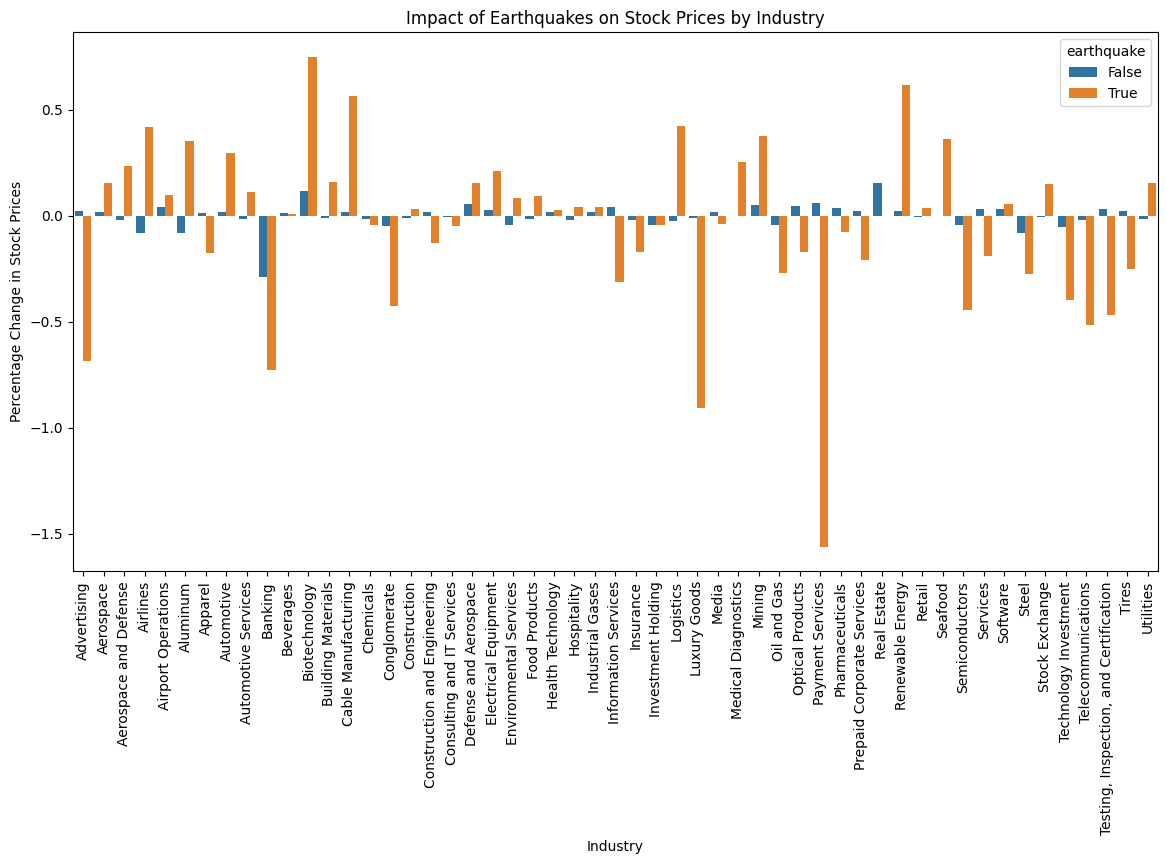

In [17]:
# Industry-wise Analysis
## To analyze the impact on different industries, we can group the data by Industry and perform similar analyses.

# Create a new column to indicate if there was an earthquake on that day
merged_data['earthquake'] = merged_data['magnitude'].notna()

# Group by Industry and earthquake to see the average change in stock prices
industry_impact_on_prices = merged_data.groupby(['industry', 'earthquake']).agg({
    'open': 'mean',
    'close': 'mean'
}).reset_index()

# Calculate the percentage change in stock prices
industry_impact_on_prices['price_change'] = (industry_impact_on_prices['close'] - industry_impact_on_prices['open']) / industry_impact_on_prices['open'] * 100

# Visualize the impact on stock prices by industry
plt.figure(figsize=(14, 7))
sns.barplot(x='industry', y='price_change', hue='earthquake', data=industry_impact_on_prices)
plt.title('Impact of Earthquakes on Stock Prices by Industry')
plt.xlabel('Industry')
plt.ylabel('Percentage Change in Stock Prices')
plt.xticks(rotation=90)
plt.show()

## Explain chart: 

### False (average days that there is NO Earthquake), True (average days that there is Earthquake)
### The height of each bar represents the average percentage price change
#### - Negative Impact: If the 'earthquake=True' bar is lower (or negative), earthquakes may correlate with stock declines .
#### - Positive Impact: If the 'earthquake=True' bar is higher, industries might benefit 
#### - No Impact: Bars of similar height suggest earthquakes have no measurable effect.

### => In here, all industries have Negative Impact (True > False)

In [18]:
# Number of Industries Affected
## To determine the number of industries affected by earthquakes, we can count the unique industries in the merged dataset.
unique_industries = merged_data['industry'].nunique()

print(f"Number of unique industries: {unique_industries}")

Number of unique industries: 53


# How Market performs before and after earthquake in the range +-20 days?

In [26]:
# Set parameters
WINDOW_SIZE = 20  # Days before/after earthquake to analyze
BASE_DAYS = 3     # Days before earthquake to use as baseline

# Convert date columns to datetime
merged_data['date'] = pd.to_datetime(merged_data['date'])  # merged_data = merge from japan_stock_data and japan_earthquake
earthquake_dates = merged_data[merged_data['earthquake']]['date'].unique()  # Unique dates prevent duplicate processing of same earthquake

In [27]:
# Create event study dataframe
## For each earthquake, creates a [-20, +20] day window around it.
event_data = []

for eq_date in earthquake_dates:
    start_date = eq_date - pd.Timedelta(days=WINDOW_SIZE)
    end_date = eq_date + pd.Timedelta(days=WINDOW_SIZE)
    
    window_data = merged_data[
        (merged_data['date'] >= start_date) & 
        (merged_data['date'] <= end_date)
    ].copy()
    
    window_data['days_from_event'] = (window_data['date'] - eq_date).dt.days   # days_from_event: to track the number of days relative to the earthquake
    window_data['earthquake_id'] = eq_date   # earthquake_id : to identify the specific earthquake
    event_data.append(window_data)

In [28]:
# Combine all event windows and reset index (prevents index conflicts from different windows)
event_study = pd.concat(event_data).reset_index(drop=True)

# Calculate normalized values
def normalize_group(group):
    # Perform normalization on the non-grouping columns
    baseline_mask = (group['days_from_event'] >= -BASE_DAYS) & (group['days_from_event'] < 0)
    baseline = group.loc[baseline_mask, 'close'].mean()
    
    if pd.notnull(baseline) and baseline != 0:
        group['normalized_close'] = (group['close'] - baseline) / baseline * 100
    else:
        group['normalized_close'] = np.nan
    
    # Return the necessary columns, including grouping columns
    return group[['date', 'close', 'days_from_event', 'normalized_close',
                 'industry', 'ticker', 'earthquake_id']]

In [29]:
# Apply normalization
event_study = (
    event_study.groupby(['industry', 'ticker', 'earthquake_id'], group_keys=False)
              .apply(normalize_group)  # Do not use include_groups=False
              .reset_index(drop=True)
)

C:\Users\dongv\AppData\Local\Temp\ipykernel_12760\2790247188.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(normalize_group)  # Do not use include_groups=False


In [30]:
# Aggregate results
agg_results = event_study.groupby(['industry', 'days_from_event'], as_index=False).agg(
    mean_change=('normalized_close', 'mean'),
    std_change=('normalized_close', 'std'),
    count=('normalized_close', 'count')
)

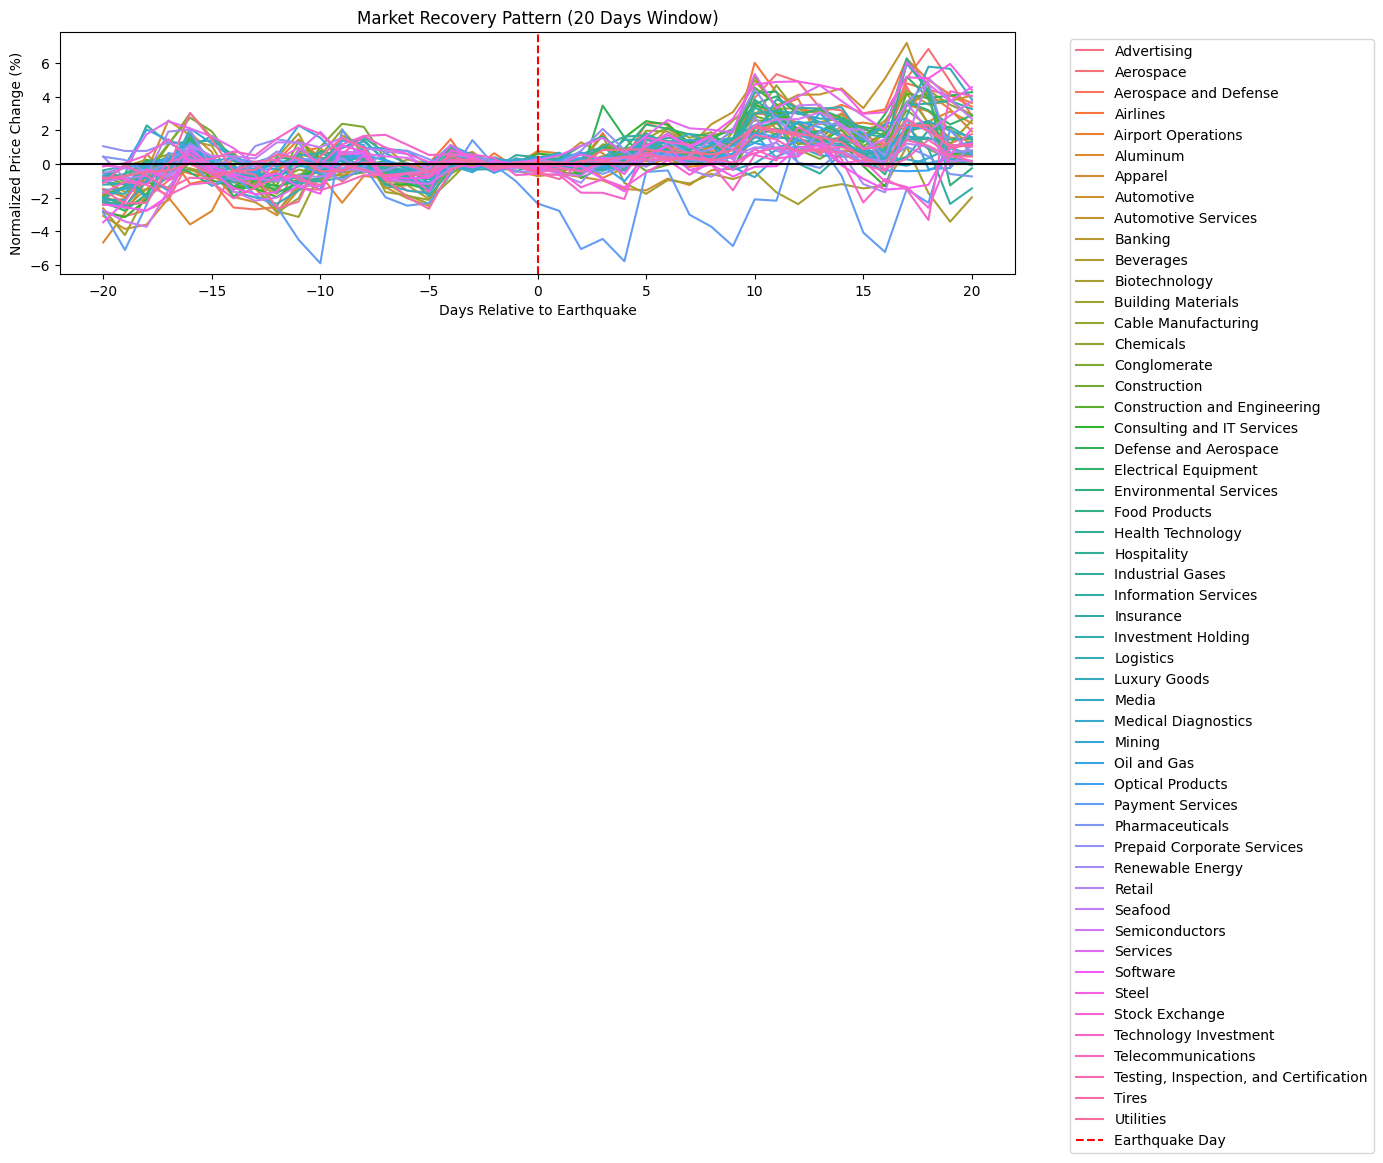

In [31]:
# Visualization
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=agg_results,
    x='days_from_event',
    y='mean_change',
    hue='industry',
    errorbar=('ci', 95)
)
plt.axvline(0, color='red', linestyle='--', label='Earthquake Day')
plt.axhline(0, color='black', linestyle='-')
plt.title(f'Market Recovery Pattern ({WINDOW_SIZE} Days Window)')
plt.xlabel('Days Relative to Earthquake')
plt.ylabel('Normalized Price Change (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Time to recover

In [32]:
# Calculate and sort recovery metrics
recovery_analysis = (
    agg_results[agg_results['days_from_event'] >= 0]
    .groupby('industry')
    .agg(
        max_impact=('mean_change', lambda x: x.min() if x.min() < 0 else x.max()),
        days_to_recover=('mean_change', lambda x: np.argmax(x >= 0) if any(x >= 0) else np.nan),
        volatility=('std_change', 'mean')
    )
    .reset_index()
    .sort_values('max_impact', ascending=True)  # Sort by most negative impact first
)

print("\nRecovery Metrics (Sorted by Maximum Impact):")
print(recovery_analysis.to_string(index=False))


Recovery Metrics (Sorted by Maximum Impact):
                              industry  max_impact  days_to_recover  volatility
                      Payment Services   -5.775769               12    6.384592
                         Biotechnology   -3.426958                0    7.097200
                 Technology Investment   -3.325883                5    5.895282
                        Stock Exchange   -2.600009                6    4.208637
                  Information Services   -2.371098                0    4.069090
                      Renewable Energy   -1.680020                0    5.206487
                              Software   -1.626817                5    3.004251
                               Apparel   -1.569243               10    4.440707
            Consulting and IT Services   -1.320822                0    5.624091
                Environmental Services   -1.269429                0    5.476167
                      Optical Products   -1.027563                1    3.2

## Metric Definitions:
#### - max_impact: The largest percentage drop in stock prices immediately after an earthquake.
#### - days_to_recover: Time (in days) for stock prices to return to pre-earthquake levels.
#### - volatility: Magnitude of price fluctuations during the recovery period (higher = more instability).

## Key Observations
#### 1. Mixed Impact:
##### - Most industries declined (negative max_impact), but Automotive (+3.5%) and Services (+6.0%) rose.
##### - Payment Services (-5.8%) and Biotechnology (-3.4%) were hit hardest.
#### 2. Recovery Speed:
##### - Many industries recovered instantly (days_to_recover = 0), suggesting minimal long-term disruption.
##### - Slower recovery for Payment Services (12 days) and Apparel (10 days) indicates prolonged challenges.
#### 3. Volatility:
#### - High volatility in Airlines (7.52) and Banking (7.11) reflects uncertainty, while Media (2.46) and Software (3.00) saw stable recoveries.

## Critical Trends
#### 1. Tech vs. Traditional Sectors:
##### - Software (-1.6%) and IT Services (-1.3%) had smaller declines and faster recoveries than heavy industries (e.g., Steel).
##### - Tech’s remote operations don't have much affected by physical disruptions.
#### 2. Market Psychology:
##### - Instant recovery (0 days) in 20+ industries implies investors often view earthquakes as short-term shocks.
##### - Exceptions (e.g., Payment Services) highlight systemic vulnerabilities.
#### 3. Volatility Patterns:
##### - High volatility in Airlines and Banking aligns with operational risks (e.g., flight cancellations, loan defaults).
##### - Low volatility in Media and Software suggests stable demand.

## Suggestion
#### Investors:
##### - Avoid sectors with slow recovery (e.g., Payment Services) post-earthquake.
##### - Consider betting on Services or Automotive for short-term gains.
#### Businesses:
##### - High-impact sectors (e.g., Payment Services) should diversify infrastructure geographically.
